In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# create an empty data frame
names_df = pd.DataFrame(columns=['yob','name','gender','total'])

# loop through the SS name text files
for yob in range(1880,2019):
    # read the data into the import data frame
    import_df = pd.read_csv(f'names/yob{yob}.txt',header=None,names=['name','gender','total'])
    # add the yob column
    import_df['yob'] = yob
    # concat the import data frame to the big data frame
    names_df = pd.concat([names_df,import_df],sort=True)

# once the data has been read in, convert yob and count to int
names_df['total']=names_df['total'].astype(int)
names_df['yob']=names_df['yob'].astype(int)

# this takes a few seconds!

In [20]:
names_df.count()

gender    1957046
name      1957046
total     1957046
yob       1957046
dtype: int64

In [6]:
gender_group = names_df.groupby(['gender'])
gender_group['name'].nunique()

gender
F    67698
M    41475
Name: name, dtype: int64

In [21]:
sorted_df = names_df.sort_values(['gender','name'],ascending=[True,True])
grouped_df = sorted_df.groupby(['gender','name'])
pct = grouped_df['total'].pct_change()
sorted_df['pct']=pct


In [22]:
# sorted_df.head(200)
# there is an issue here caused by missing rows where a name had a count of 0 for a given year.
# for pct_change(), we'd have to add the missing rows
# can do this by joining to a dataframe with just a dummy key and the entire range of years.

In [33]:
# line plot function
def getPlot(name,gender,center):
    # get a dataframe for just that name and gender
    plot_df = names_df.loc[(names_df['name']==name) & (names_df['gender']==gender) ]
    
    # set the series to plot
    x_axis = plot_df['yob']
    values = plot_df['total']
    # create the plot
    plt.figure(figsize=[15,5])
    plt.plot(x_axis,values,color = 'coral',marker = 'o')
    
    # set the axes limits and ticks
    plt.ylim(0,max(values)*1.05)
    plt.xlim(center-30,center+30)
    plt.xticks(np.arange(center-30,center+30,10))
    # draw a horizontal line at the center
    plt.vlines(center,0,max(values)*1.05, color = 'blue')
    
    # other chart elements
    plt.title(f'Popularity of "{name}" ({gender})')
    plt.ylabel('Count')
    plt.xlabel('Year')
    plt.grid()
#     plt.savefig(f'plots/{name}-{gender}.png', dpi=600)

In [34]:
def getPlot2(name,gender,center):
    # get a dataframe for that year and gender
    plot_df = sorted_df.loc[(sorted_df['yob']==center) & (sorted_df['gender']==gender)]
    plot_df1 = sorted_df.loc[(sorted_df['yob']==center) & (sorted_df['gender']==gender) & (sorted_df['name']==name)]

    # set the series to plot
    x_axis = plot_df['total']
    values = plot_df['pct']
    x_focus = plot_df1['total']
    value_focus = plot_df1['pct']
    
    # create the plot
    plt.figure(figsize=[15,5])
    plot1 = plt.scatter(x_axis,values,color = 'coral',marker = 'o')
    Plot2 = plt.scatter(x_focus,value_focus, color = 'blue',marker = 's')

    # other chart elements
    plt.title(f'Popularity of "{name}" ({gender}) in {center}')
    plt.ylabel('Pct Change from Prior Year')
    plt.xlabel('Count')
    plt.xlim(0,20000)
    plt.grid()
    #plt.savefig(f'plots/{name}-{gender}.png', dpi=600)

In [60]:
movies_df = pd.read_csv('MovieData/Resources/NameTable.csv')
movies_df['YearAfter'] = movies_df['Year'] + 1

merged_df = pd.merge(movies_df, sorted_df,  how='inner', left_on=['Name','YearAfter'], right_on = ['name','yob'])

filter_df = merged_df.loc[(merged_df['total']>10) & (merged_df['pct']>3.00)]
filter_df  

,Name,Year,Movie,YearAfter,gender,name,total,yob,pct
0,Henry,1915,The Birth of a Nation,1916,F,Henry,82,1916,0.138889
1,Henry,1915,The Birth of a Nation,1916,M,Henry,10656,1916,0.051095
2,Lillian,1915,The Birth of a Nation,1916,F,Lillian,9592,1916,0.004819
3,Lillian,1915,The Birth of a Nation,1916,M,Lillian,26,1916,0.083333
4,Mae,1915,The Birth of a Nation,1916,F,Mae,2607,1916,0.048673


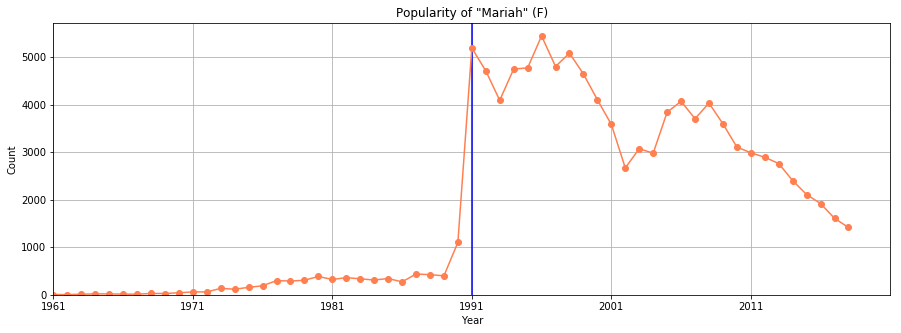

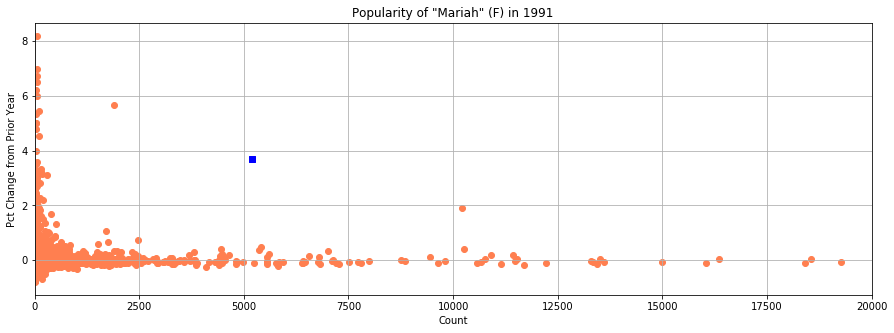

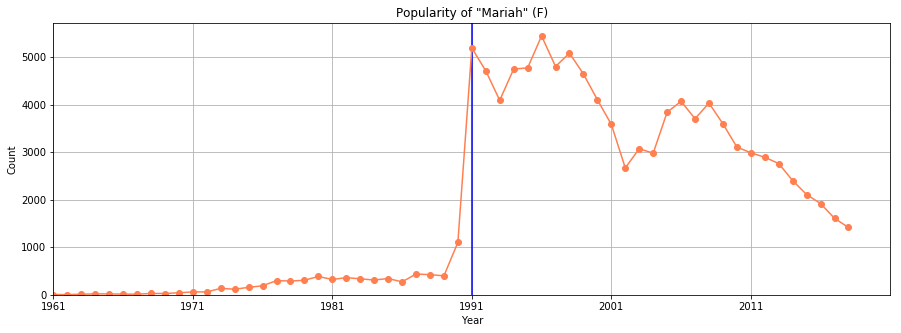

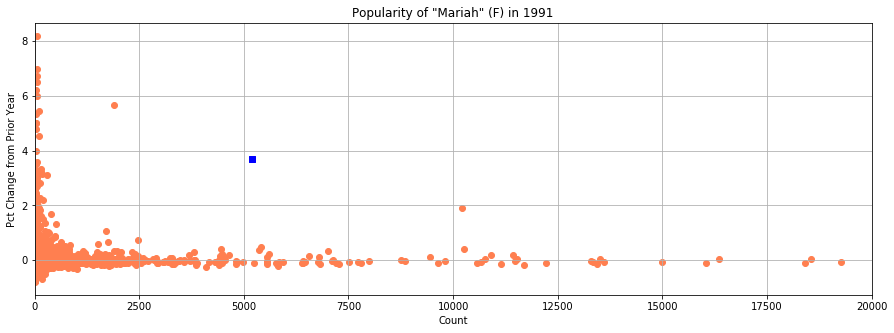

In [94]:
for x in filter_df.iterrows():
    getPlot(x[1][5],x[1][4],x[1][7])
    getPlot2(x[1][5],x[1][4],x[1][7]) 

In [93]:
singers_df = pd.read_csv('summary_df_update.csv')
singers_df['YearAfter'] = singers_df['Date'].str[:4].astype('int') + 1

merged_df = pd.merge(singers_df, sorted_df,  how='inner', left_on=['First Name','YearAfter'], right_on = ['name','yob'])

filter_df = merged_df.loc[(merged_df['total']>100) & (merged_df['pct']>3.00)]
filter_df

,Title,First Name,Date,YearAfter,gender,name,total,yob,pct
291,Love Takes Time,Mariah,1990-11-17,1991,F,Mariah,5192,1991,3.707162
293,Vision Of Love,Mariah,1990-08-18,1991,F,Mariah,5192,1991,3.707162


In [96]:
# just looking at spikes from the names dataframe
filter_df = sorted_df.loc[(sorted_df['total']>1000) & (sorted_df['pct']>3.00)]
print(filter_df)    

      gender      name  total   yob         pct
201        F   Aaliyah   1451  1994   64.954545
237        F   Alondra   1205  1995    7.087248
114        F   Ashanti   2945  2002    9.480427
85         F    Brenda   2756  1939    3.076923
167        F   Brianne   1661  1979    7.222772
201        F    Catina   1370  1972   90.333333
101        F    Cheryl   2878  1943    3.877966
138        F    Deanna   1624  1937   20.090909
204        F      Deja   1420  1995    4.795918
215        F    Deneen   1604  1964   71.909091
156        F     Iesha   1896  1991    5.652632
147        F    Jaclyn   1939  1977    4.966154
28         F     Jaime   7837  1976    7.565027
53         F     Jenna   5879  1984    4.033390
235        F   Jillian   1055  1977    3.186508
218        F   Julissa   1355  1997    4.113208
116        F    Katina   2744  1972   27.884211
132        F     Kayla   2275  1982    6.154088
113        F     Kiara   2624  1989   10.819820
133        F   Lindsay   2070  1976    3

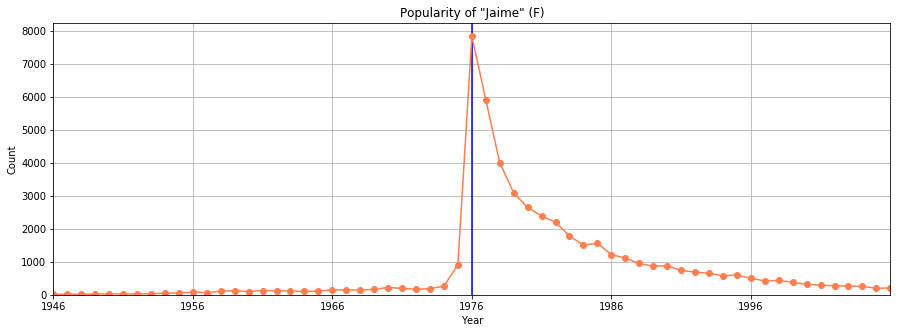

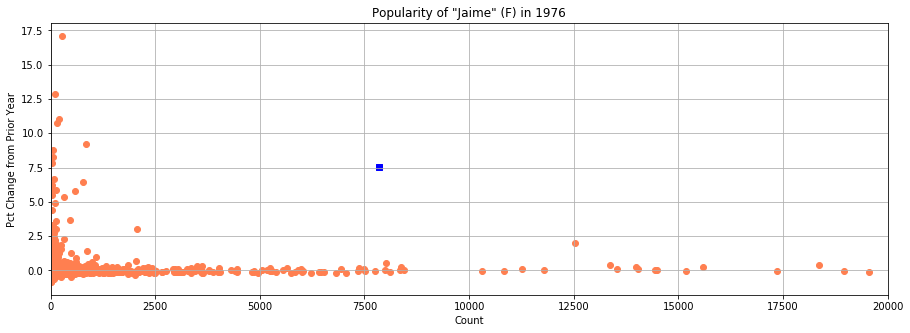

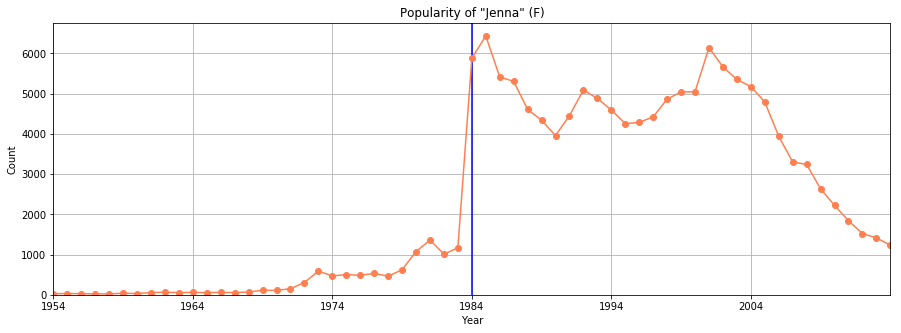

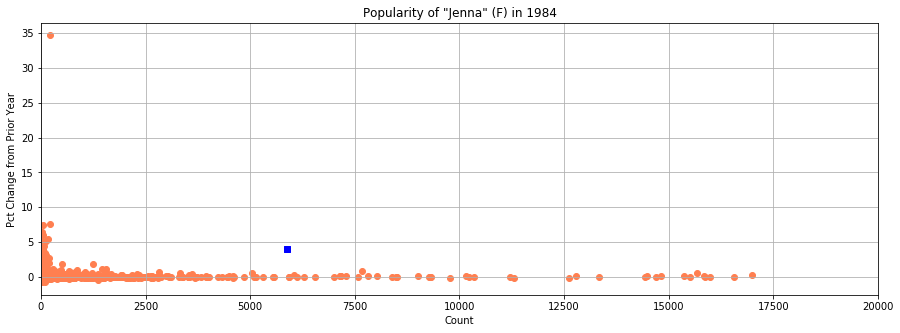

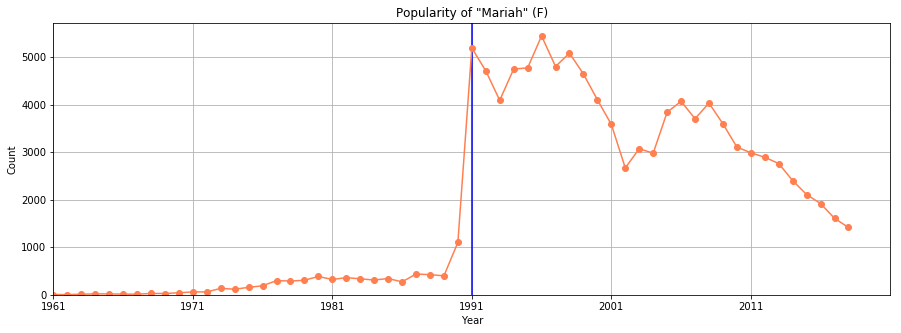

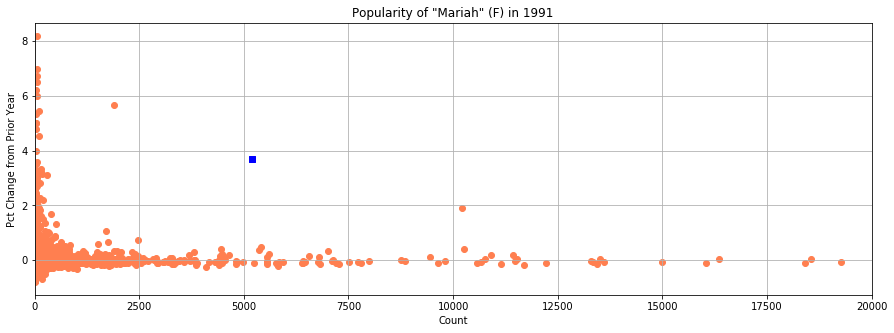

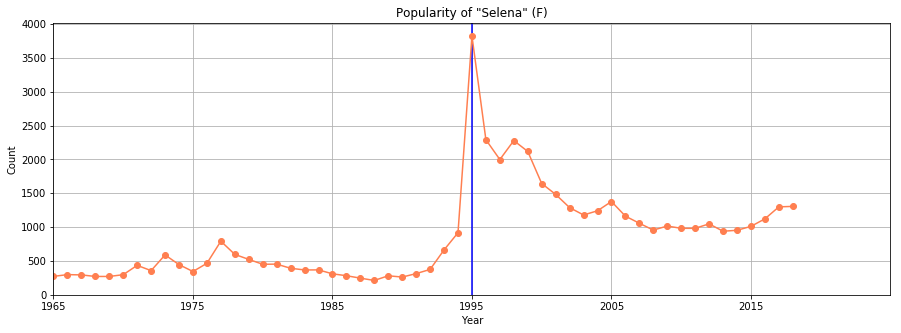

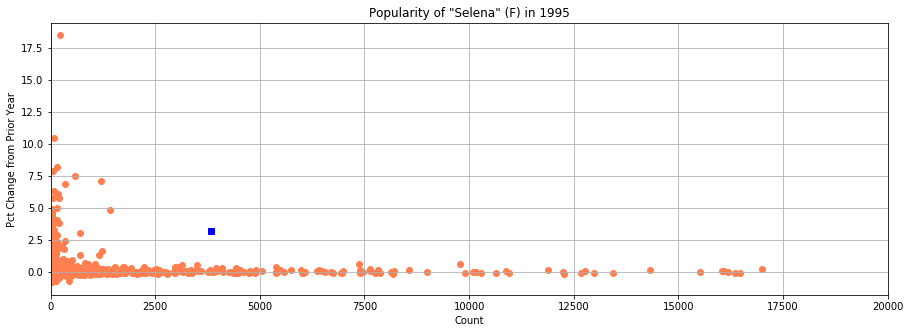

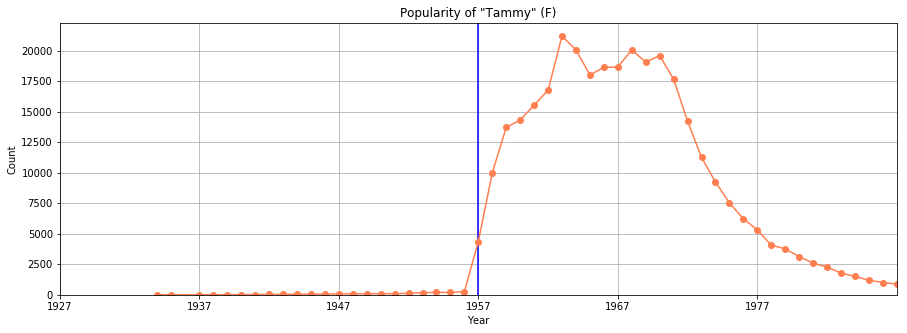

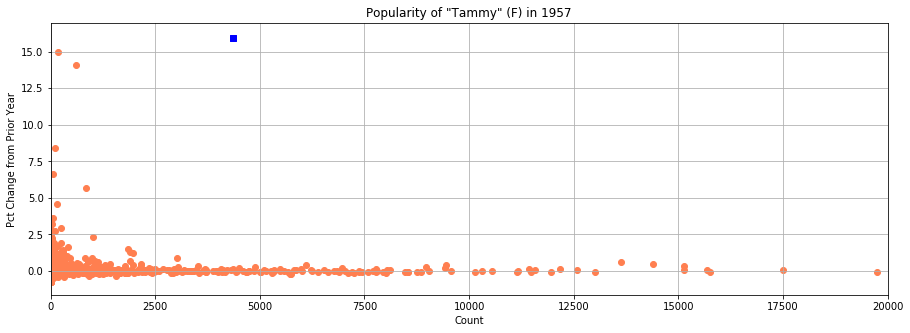

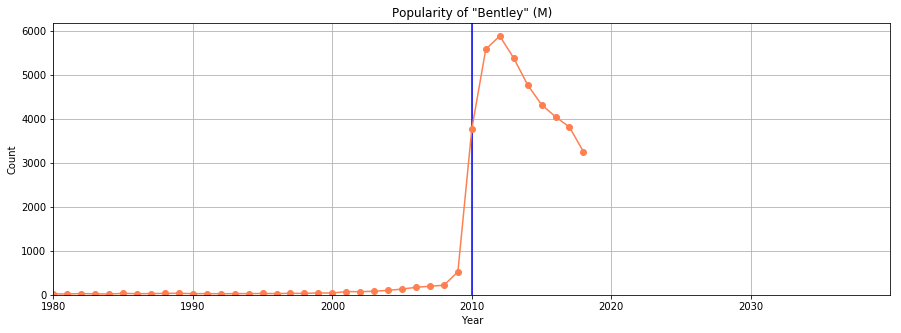

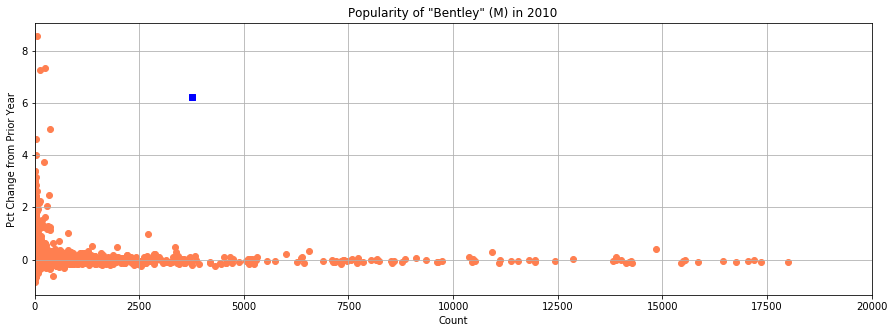

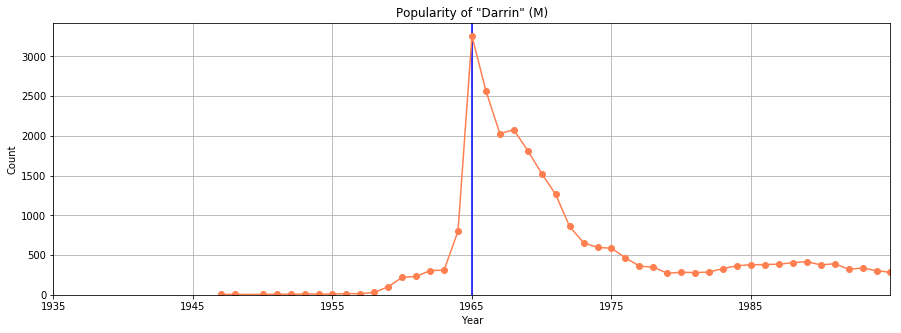

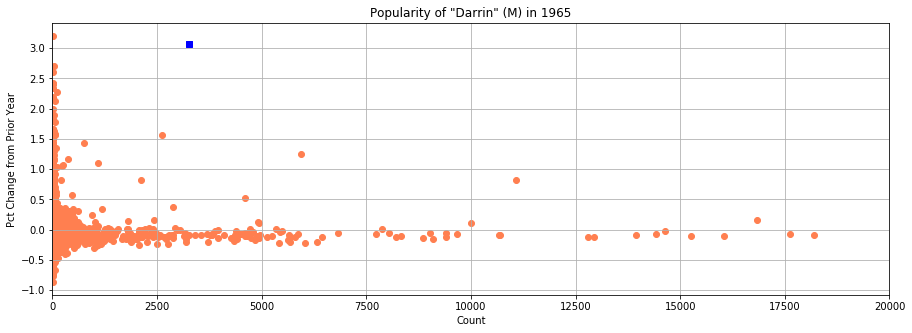

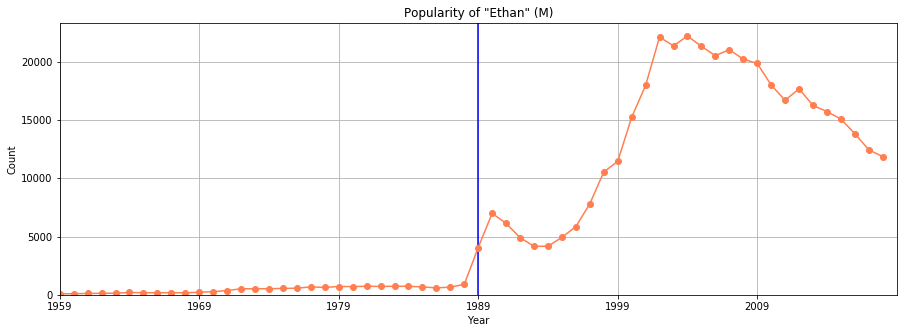

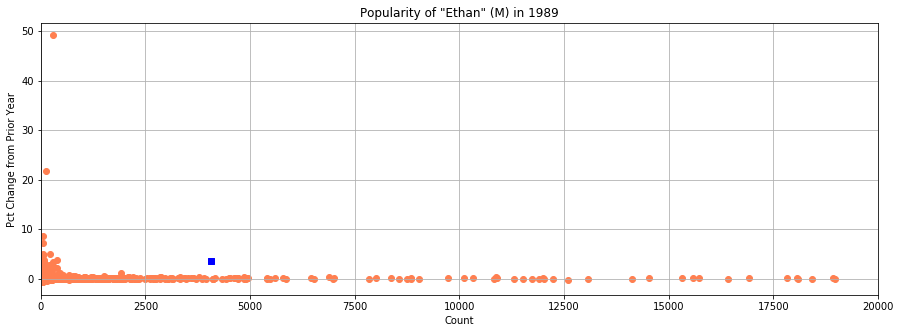

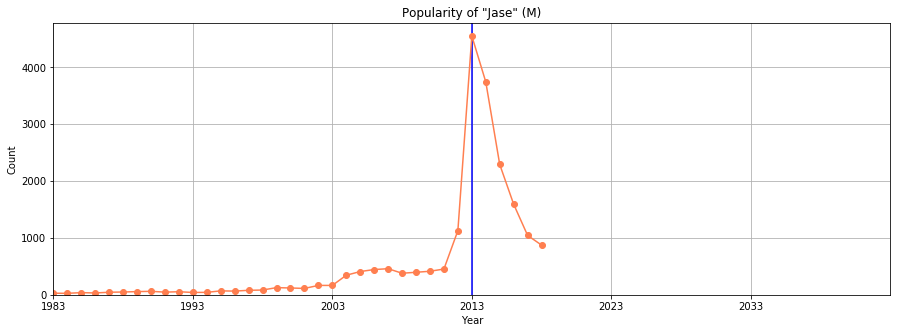

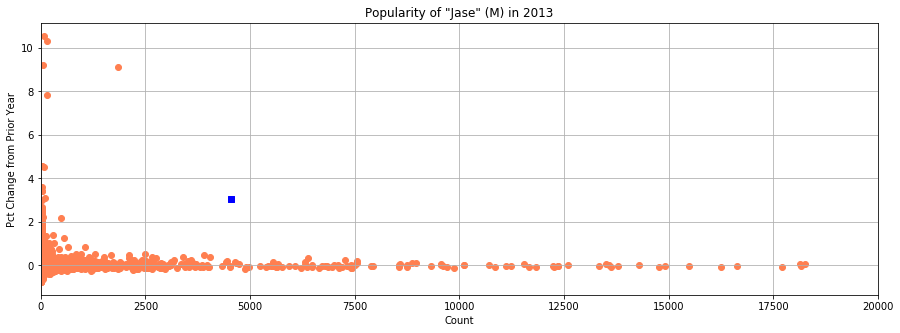

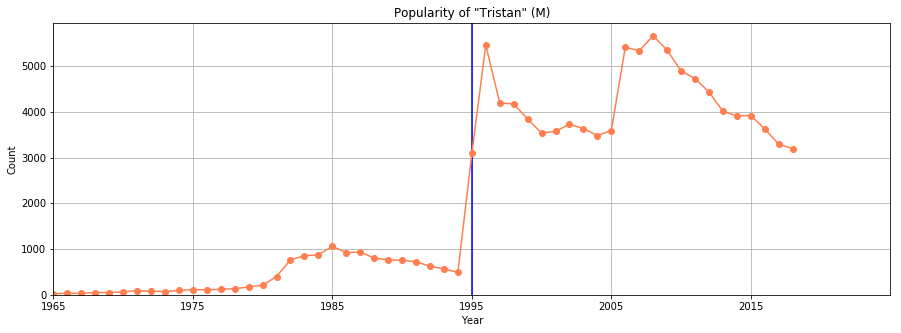

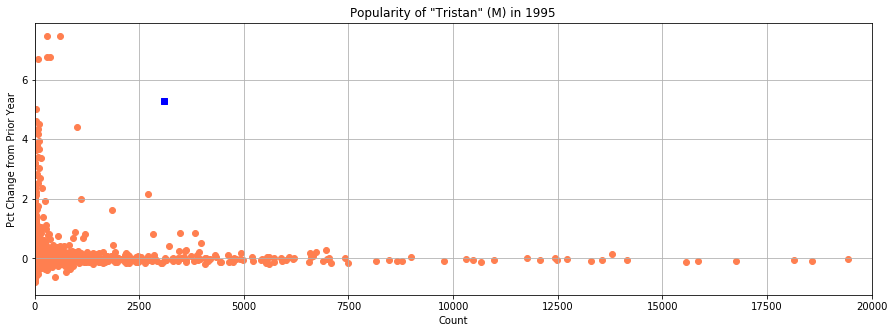

In [43]:
# for x in filter_df.iterrows():
#     getPlot(x[1][1],x[1][0],x[1][3])
#     getPlot2(x[1][1],x[1][0],x[1][3]) 

In [44]:
# name = input('Name? >>> ')
# gender = input('Gender? M/F >>> ')
# center = int(input('Year? >>> '))
# getPlot(name,gender,center)
# getPlot2(name,gender,center)